In [2]:
import sys
sys.path.append('../src')

import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from data.dataset import PancreasDataset, create_subtype_mapping
from data.visualization import plot_case_overview, plot_dataset_distribution, plot_intensity_distribution

# Set up paths
DATA_ROOT = "../data"
RESULTS_DIR = Path("../results")
RESULTS_DIR.mkdir(exist_ok=True)
# Initialize dataset
dataset = PancreasDataset(DATA_ROOT)


--Dataset Statistics--

TRAIN SET:
  subtype0: 62
  subtype0_shape: (161, 116, 106)
  subtype0_unique_labels: [0. 1. 2.]
  subtype1: 106
  subtype1_shape: (248, 166, 83)
  subtype1_unique_labels: [0.         1.00001526 2.        ]
  subtype2: 84
  subtype2_shape: (147, 107, 67)
  subtype2_unique_labels: [0. 1. 2.]

VALIDATION SET:
  subtype0: 9
  subtype0_shape: (200, 96, 124)
  subtype0_unique_labels: [0. 1. 2.]
  subtype1: 15
  subtype1_shape: (261, 152, 49)
  subtype1_unique_labels: [0.         1.00001526 2.        ]
  subtype2: 12
  subtype2_shape: (179, 124, 87)
  subtype2_unique_labels: [0.         1.00001526 2.        ]


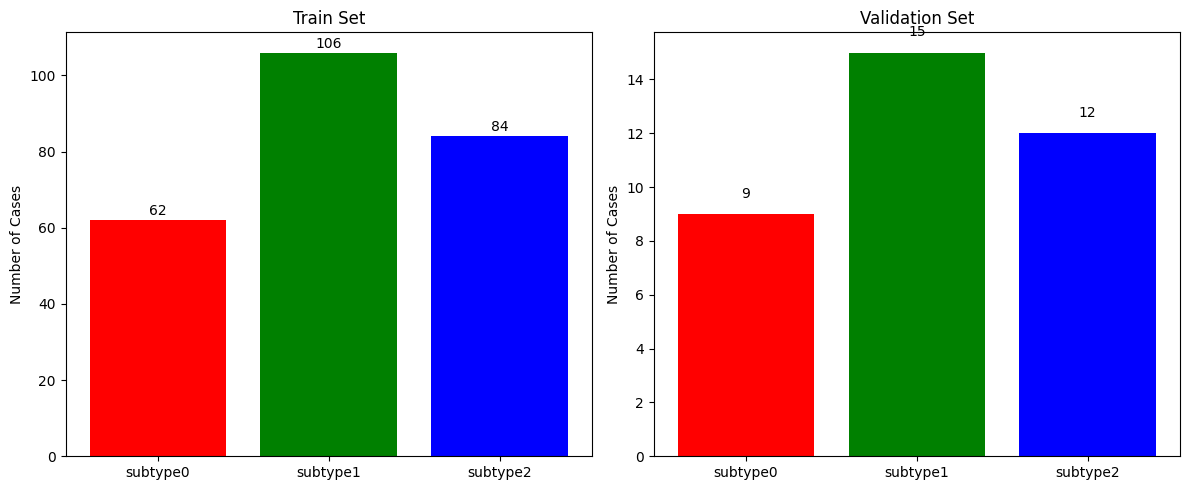

--Sample Case Analysis--

Analyzing train subtype0: quiz_0_041
Image shape: (161, 116, 106)
Image range: [-1034.00, 1727.00]
Image mean: 69.72
Image std: 136.94
Mask shape: (161, 116, 106)
Unique labels: [0. 1. 2.]
Label counts: {np.float64(0.0): np.int64(1832804), np.float64(1.0): np.int64(124960), np.float64(2.0): np.int64(21892)}


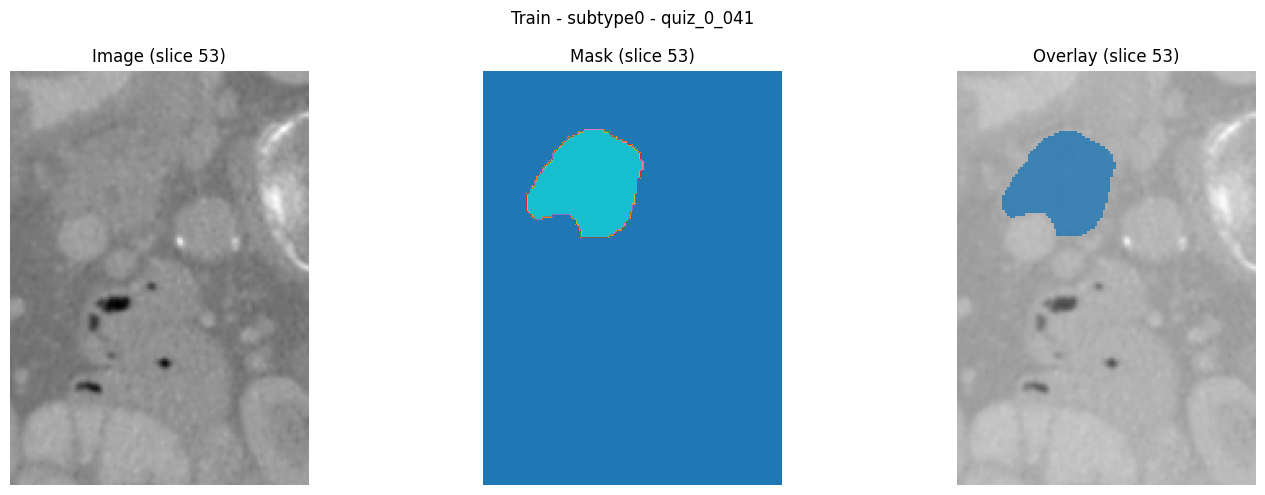

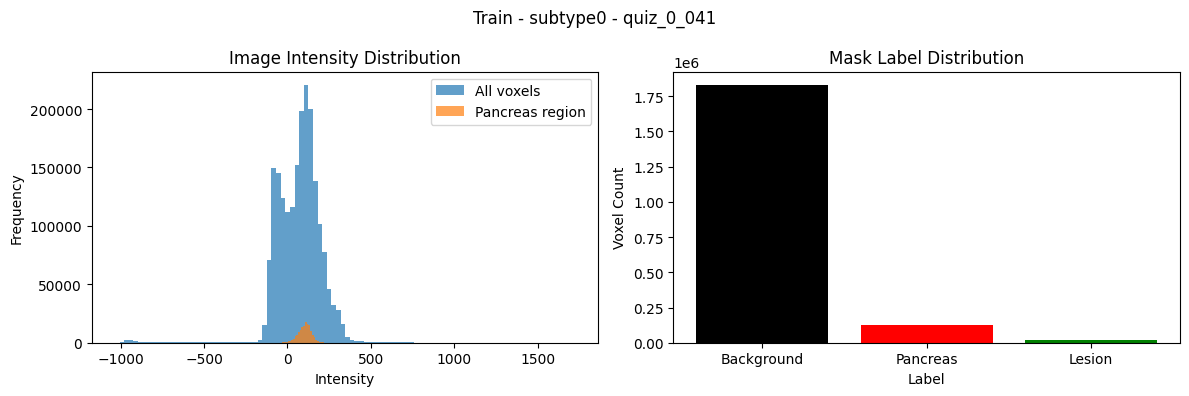


Analyzing train subtype1: quiz_1_196
Image shape: (248, 166, 83)
Image range: [-1024.00, 1955.00]
Image mean: 31.50
Image std: 156.70
Mask shape: (248, 166, 83)
Unique labels: [0.         1.00001526 2.        ]
Label counts: {np.float64(0.0): np.int64(3194634), np.float64(1.0000152587890625): np.int64(211582), np.float64(2.0): np.int64(10728)}


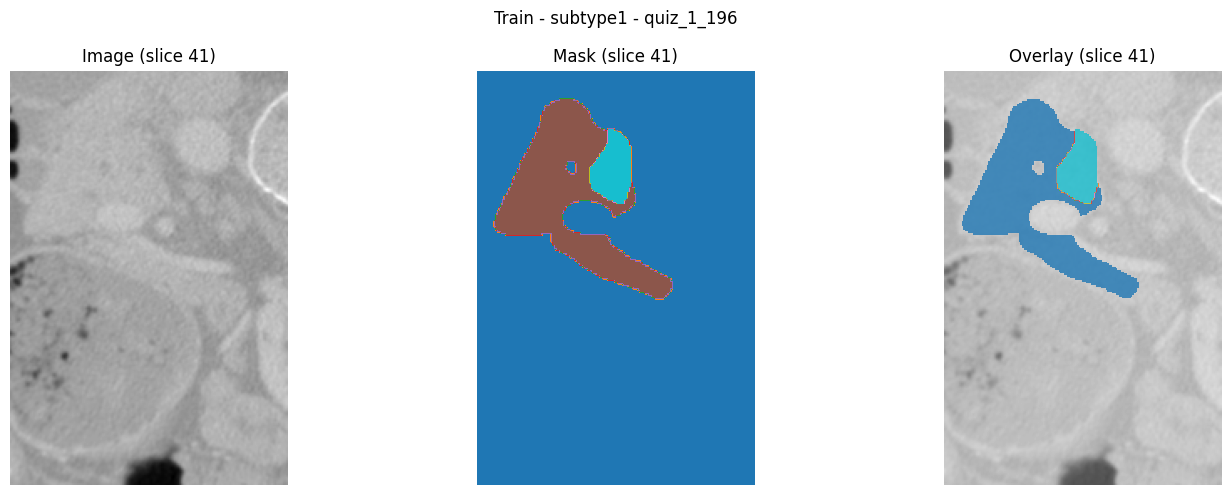

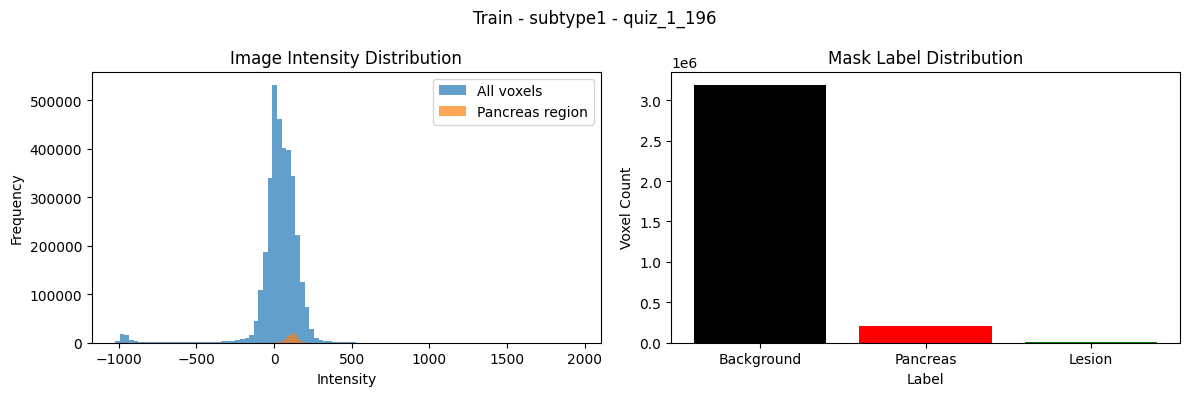


Analyzing train subtype2: quiz_2_307
Image shape: (147, 107, 67)
Image range: [-1024.00, 1144.00]
Image mean: 43.22
Image std: 106.86
Mask shape: (147, 107, 67)
Unique labels: [0. 1. 2.]
Label counts: {np.float64(0.0): np.int64(999033), np.float64(1.0): np.int64(47456), np.float64(2.0): np.int64(7354)}


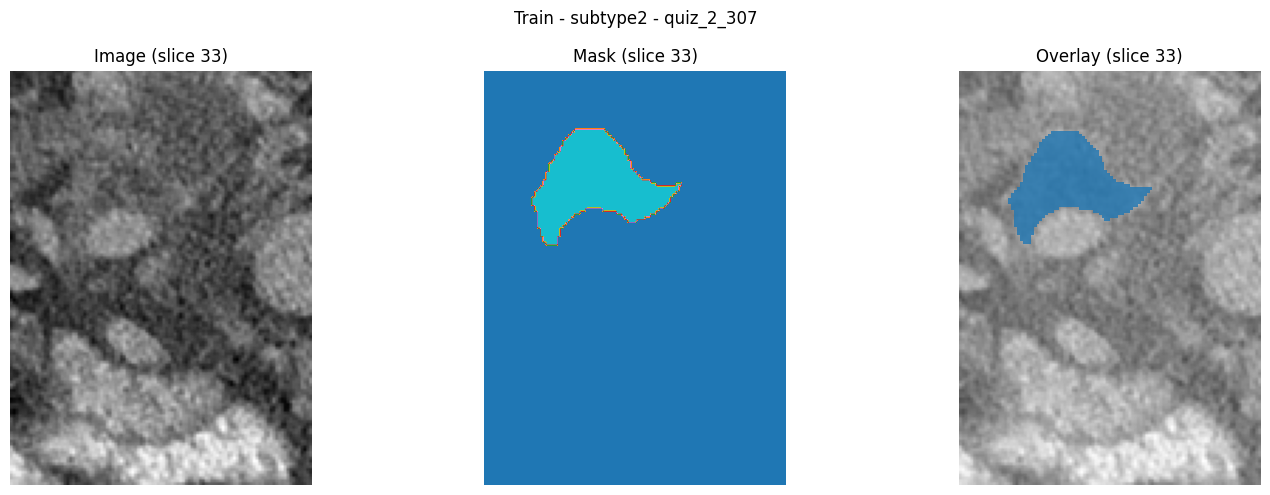

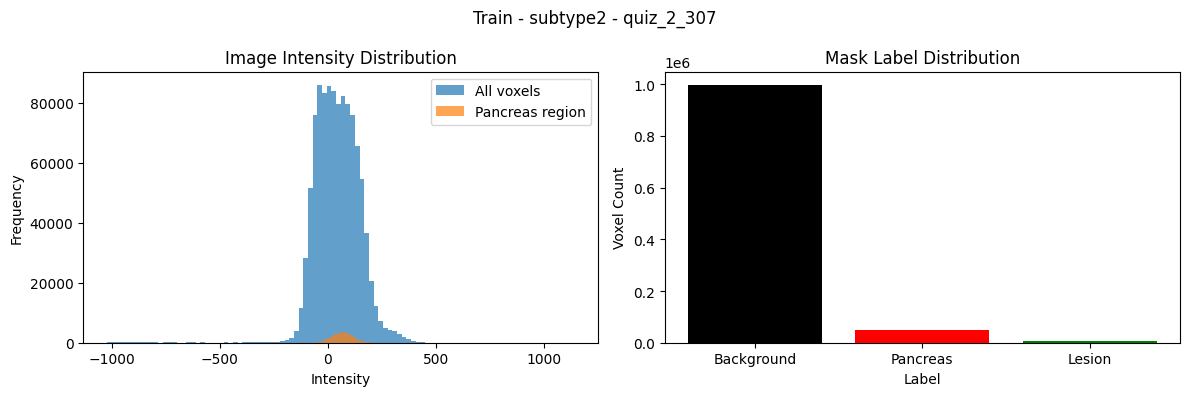


Analyzing validation subtype0: quiz_0_244
Image shape: (200, 96, 124)
Image range: [-1032.00, 312.00]
Image mean: -5.35
Image std: 99.63
Mask shape: (200, 96, 124)
Unique labels: [0. 1. 2.]
Label counts: {np.float64(0.0): np.int64(2211027), np.float64(1.0): np.int64(166279), np.float64(2.0): np.int64(3494)}


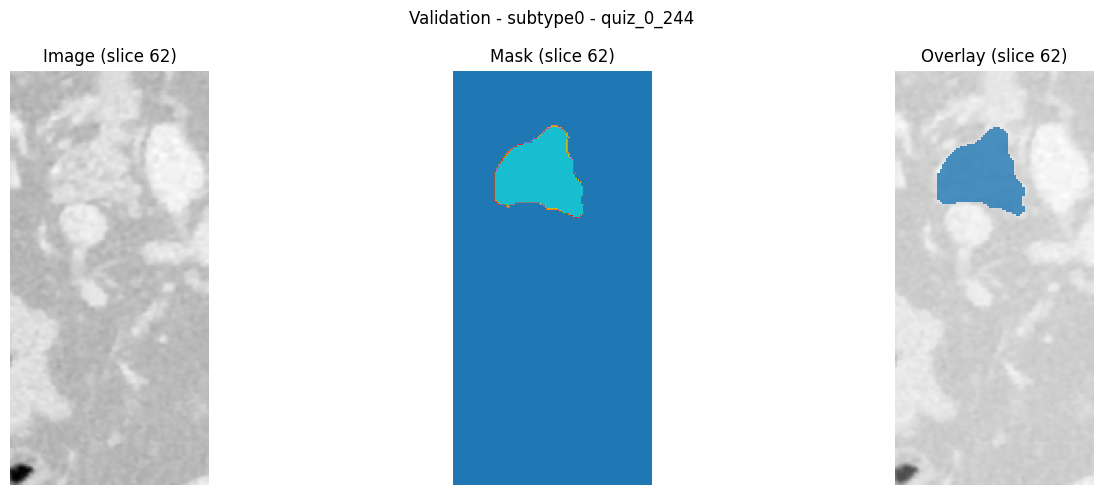

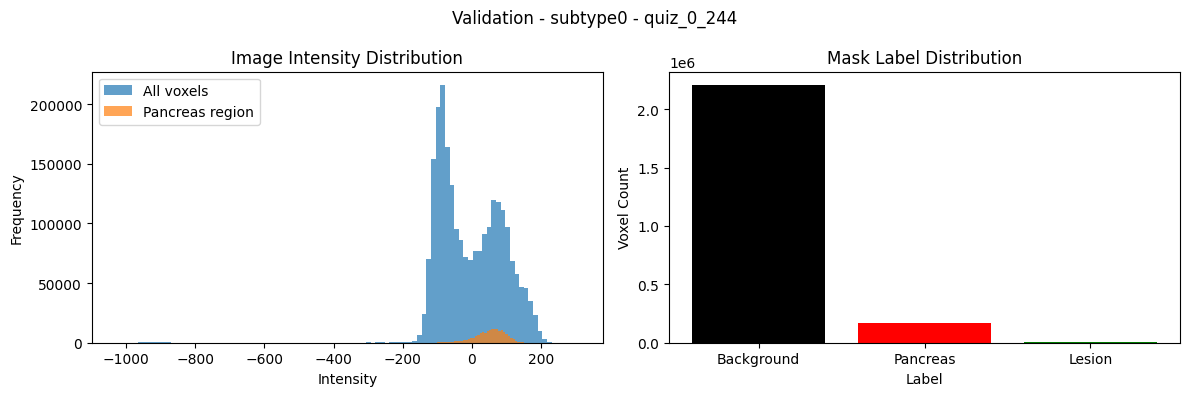


Analyzing validation subtype1: quiz_1_331
Image shape: (261, 152, 49)
Image range: [-1016.00, 1137.00]
Image mean: 0.81
Image std: 115.41
Mask shape: (261, 152, 49)
Unique labels: [0.         1.00001526 2.        ]
Label counts: {np.float64(0.0): np.int64(1886991), np.float64(1.0000152587890625): np.int64(50018), np.float64(2.0): np.int64(6919)}


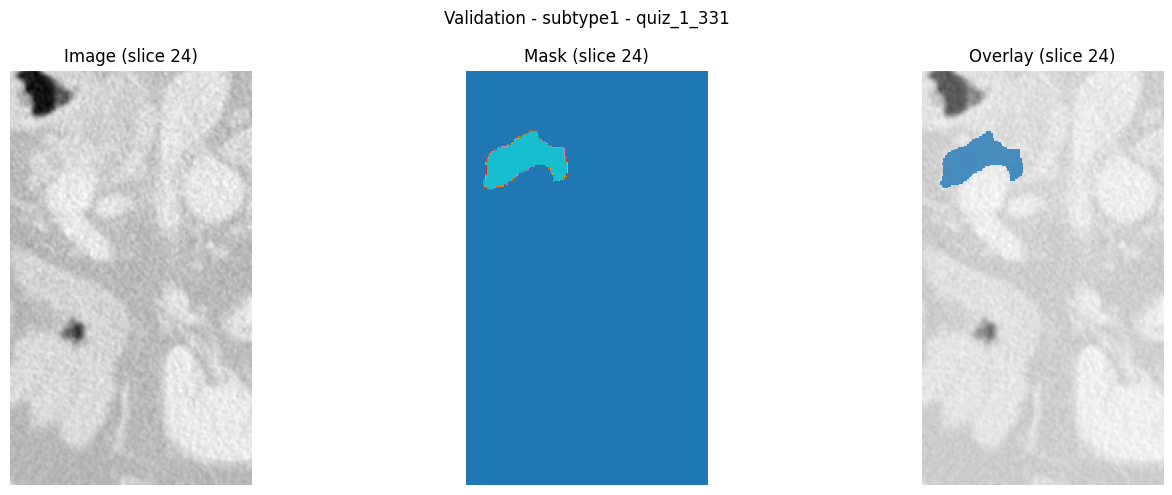

In [ ]:
# Dataset Statistics
print("--Dataset Statistics--")
stats = dataset.get_dataset_stats()

for split, split_stats in stats.items():
    print(f"\n{split.upper()} SET:")
    for key, value in split_stats.items():
        print(f"  {key}: {value}")

# Plot dataset distribution
plot_dataset_distribution(stats, save_path=RESULTS_DIR / "dataset_distribution.png")

# Explore sample cases
print("--Sample Case Analysis--")

# Get sample cases from each subtype
for split in ["train", "validation"]:
    files = dataset.get_file_list(split)
    
    for subtype, file_list in files.items():
        if file_list:
            sample_case = file_list[0].replace('.nii.gz', '')
            print(f"\nAnalyzing {split} {subtype}: {sample_case}")
            
            # Load case
            img, mask = dataset.load_case(split, subtype, sample_case)
            
            print(f"Image shape: {img.shape}")
            print(f"Image range: [{img.min():.2f}, {img.max():.2f}]")
            print(f"Image mean: {img.mean():.2f}")
            print(f"Image std: {img.std():.2f}")
            
            if mask is not None:
                print(f"Mask shape: {mask.shape}")
                print(f"Unique labels: {np.unique(mask)}")
                print(f"Label counts: {dict(zip(*np.unique(mask, return_counts=True)))}")
                
                # Plot case overview
                plot_case_overview(
                    img, mask, 
                    title=f"{split.capitalize()} - {subtype} - {sample_case}",
                    save_path=RESULTS_DIR / f"{split}_{subtype}_{sample_case}_overview.png"
                )
                
                # Plot intensity distribution
                plot_intensity_distribution(
                    img, mask,
                    title=f"{split.capitalize()} - {subtype} - {sample_case}",
                    save_path=RESULTS_DIR / f"{split}_{subtype}_{sample_case}_intensity.png"
                )
            else:
                # Test set case
                plot_case_overview(
                    img, None,
                    title=f"{split.capitalize()} - {sample_case}",
                    save_path=RESULTS_DIR / f"{split}_{sample_case}_overview.png"
                )

In [11]:
# Summary statistics
print("---Summary---")
subtype_mapping = create_subtype_mapping()
print(f"Subtype mapping: {subtype_mapping}")

total_train = sum(stats['train'][subtype] for subtype in ['subtype0', 'subtype1', 'subtype2'])
total_val = sum(stats['validation'][subtype] for subtype in ['subtype0', 'subtype1', 'subtype2'])

print(f"Total training cases: {total_train}")
print(f"Total validation cases: {total_val}")

# Check if we have test cases
test_files = list((Path(DATA_ROOT) / "test").glob("*.nii.gz"))
print(f"Total test cases: {len(test_files)}")

print("Data exploration completed!") 

---Summary---
Subtype mapping: {'subtype0': 0, 'subtype1': 1, 'subtype2': 2}
Total training cases: 252
Total validation cases: 36
Total test cases: 72
Data exploration completed!
